<a href="https://colab.research.google.com/github/percivalyan/GenerateDummyDataKaryawan/blob/main/GenerateDummyDataKaryawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.3 MB/s eta 0:00:00


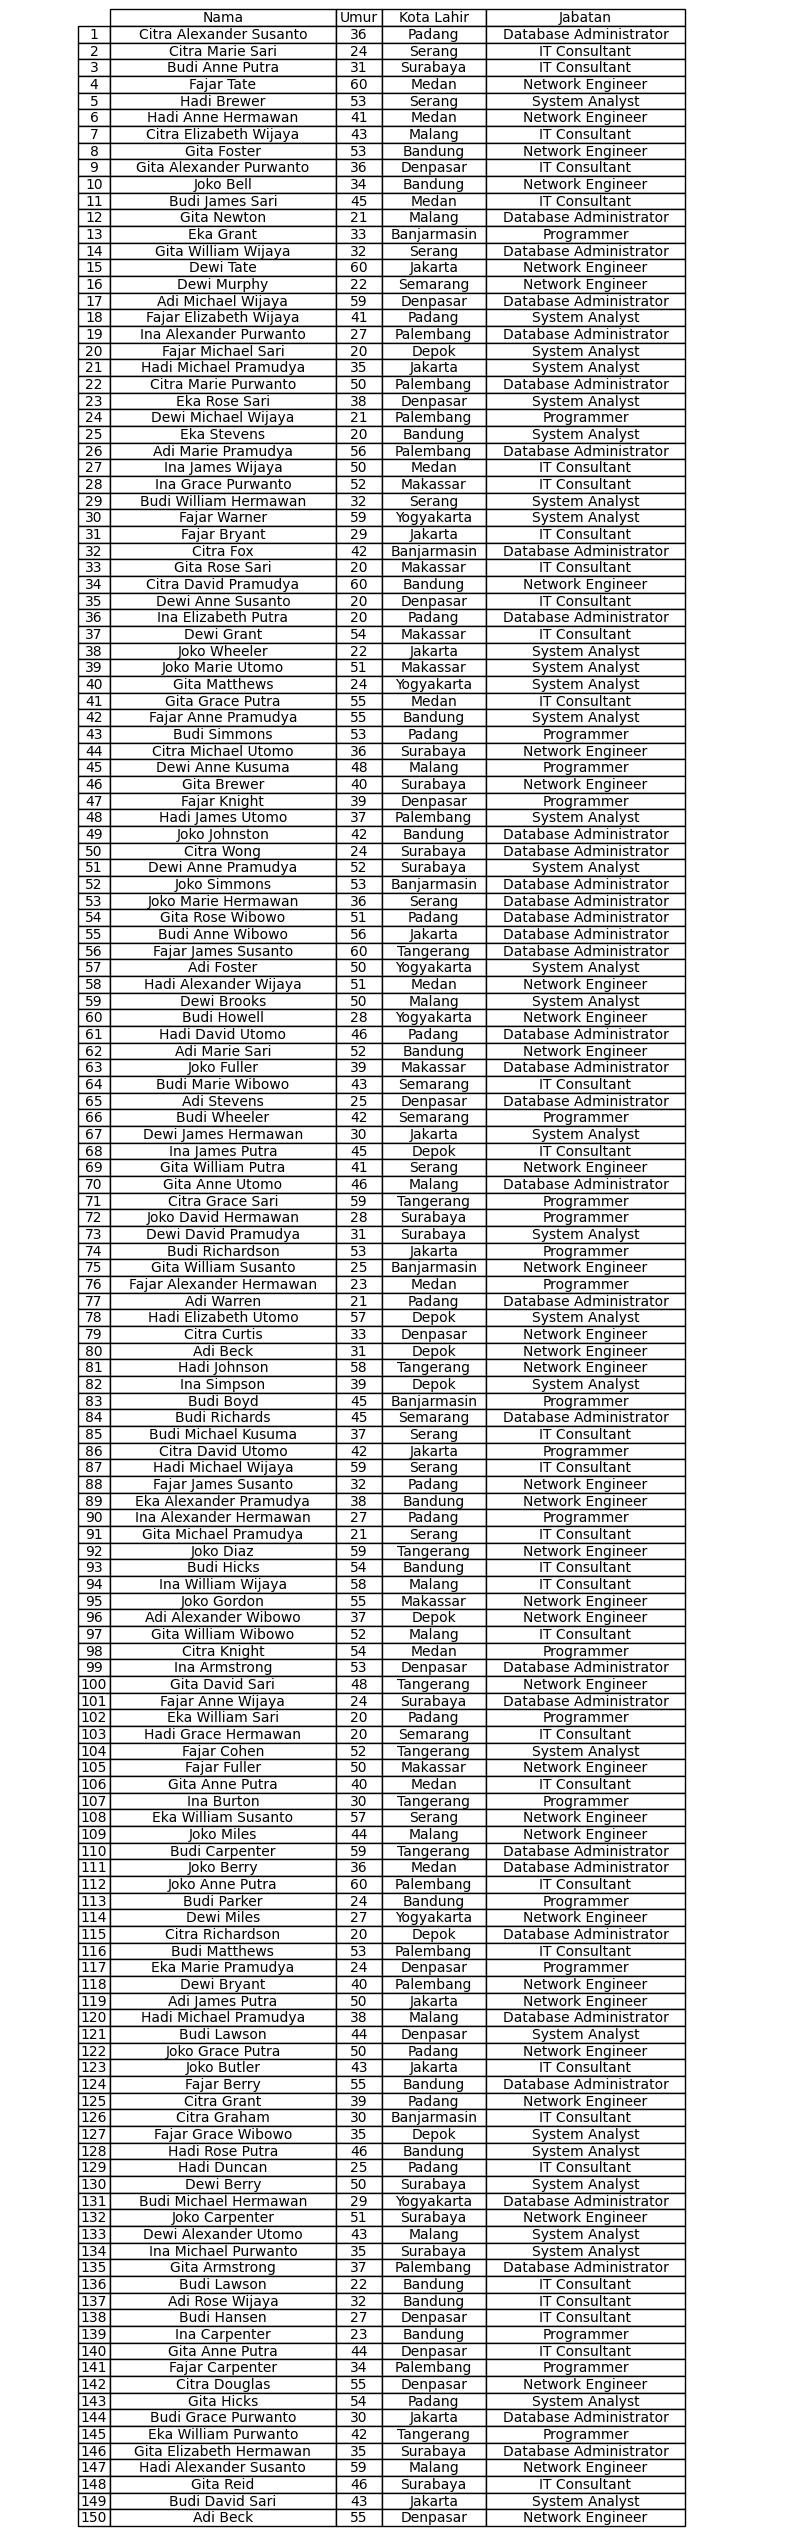

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import io
import base64
from IPython.display import display, HTML

# Daftar nama
nama_depan = ['Adi', 'Budi', 'Citra', 'Dewi', 'Eka', 'Fajar', 'Gita', 'Hadi', 'Ina', 'Joko']
nama_tengah = ['Alexander', 'Rose', 'James', 'Marie', 'William', 'Elizabeth', 'Michael', 'Anne', 'David', 'Grace']
nama_belakang = ['Wibowo', 'Susanto', 'Kusuma', 'Sari', 'Putra', 'Wijaya', 'Purwanto', 'Pramudya', 'Utomo', 'Hermawan']
nama_lainnya = ['King', 'Stewart', 'Parker', 'Turner', 'Brooks', 'Foster', 'Murphy', 'Ross', 'Coleman', 'Bailey', 'Rivera', 'Bryant', 'Knight', 'Warren', 'Hicks', 'Hicks', 'Graham', 'Pierce', 'Miles', 'Gordon', 'Fisher', 'Mason', 'Cox', 'Fisher', 'Shaw', 'Sullivan', 'Mills', 'Morrison', 'Matthews', 'Fuller', 'Curtis', 'Olson', 'Richards', 'Beck', 'Alexander', 'Diaz', 'Bell', 'Ford', 'Richardson', 'Owens', 'Carpenter', 'Hanson', 'Weaver', 'Carpenter', 'Brewer', 'Butler', 'Fields', 'Reid', 'Hawkins', 'Armstrong', 'Boyd', 'Wheeler', 'Grant', 'Simmons', 'Stone', 'Andrews', 'Berry', 'Knight', 'Stevens', 'Vasquez', 'Johnson', 'Gonzalez', 'Hicks', 'Wagner', 'Wheeler', 'Castillo', 'Dean', 'West', 'Howell', 'Johnston', 'Simmons', 'Berry', 'Fox', 'Larson', 'Duncan', 'Armstrong', 'Knight', 'Simpson', 'Griffin', 'Stevens', 'Buchanan', 'Watson', 'Hansen', 'Hicks', 'Cohen', 'Douglas', 'Lawson', 'Warner', 'Smith', 'Tate', 'Newton', 'Wong', 'Stevens', 'Harmon', 'Fuller', 'Hanson', 'Alexander', 'Henry', 'Burton', 'Miles']

# Daftar kota
kota = ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Semarang', 'Denpasar', 'Makassar', 'Palembang', 'Padang', 'Yogyakarta', 'Tangerang', 'Malang', 'Banjarmasin', 'Serang', 'Depok']

# Generate data identitas secara random untuk 150 karyawan
data_karyawan = []
for i in range(150):
    if random.random() < 0.5:
        nama = random.choice(nama_depan) + ' ' + random.choice(nama_tengah) + ' ' + random.choice(nama_belakang)
    else:
        nama = random.choice(nama_depan) + ' ' + random.choice(nama_lainnya)
    umur = random.randint(20, 60)
    kota_lahir = random.choice(kota)
    jabatan = random.choice(['Programmer', 'Network Engineer', 'Database Administrator', 'System Analyst', 'IT Consultant'])
    data_karyawan.append({'Nama': nama, 'Umur': umur, 'Kota Lahir': kota_lahir, 'Jabatan': jabatan})

# Konversi data karyawan menjadi DataFrame
df = pd.DataFrame(data_karyawan)

# Set index dimulai dari 1
df.index += 1

# Buat gambar dan subplot
fig, ax = plt.subplots(figsize=(10, 20))

# Hapus sumbu
ax.axis('off')

# Tambahkan tabel
tbl = table(ax, df, loc='center', colWidths=[0.2, 0.15, 0.2, 0.2])

# Atur gaya tabel
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(df.columns))))

# Atur teks rata tengah
for key, cell in tbl.get_celld().items():
    cell.set_text_props(ha='center')

# Tampilkan plot
plt.show()

# Simpan DataFrame ke dalam file Excel saat tombol ditekan
def save_excel(df):
    output = io.BytesIO()
    with pd.ExcelWriter(output, engine='xlsxwriter') as writer:
        df.to_excel(writer, index=True, sheet_name='Sheet1')
    output.seek(0)
    return output

# Buat link download
def create_download_link(df, title = "Download Excel", filename = "data_karyawan.xlsx"):
    excel_data = save_excel(df)
    b64 = base64.b64encode(excel_data.getvalue()).decode()
    href = f'<a href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}" download="{filename}">{title}</a>'
    return href

# Tampilkan link download
display(HTML(create_download_link(df)))
